<h1> Lecture 10:  Parameter Estimate using the maximum likelihood </h1>


<h3> Exercise 10.1 </h3>
<p> Write a library of functions to determine the parameter τ of an exponential distribution from a list of numbers filled with pseudo-random numbers distributed according to an exponential probability density distribution.

Compare the result obtained with the mean of the numbers saved in the list.

How does the result depend on the initial interval passed to the sezione_aurea_max_LL function?</p>

In [1]:
import random
import numpy as np
import stats as stats
from goldensearch import goldenratioMax
from likelihood import likelihood
from likelihood import loglikelihood
from math import exp

# ---------------------------------------------------------------------------------------------------------------
#this method  generate a single event that follow an exponential pdf
#---------------------------------------------------------------------------------------------------------------

def rand_exp(tau,seed = 0.):
     
     if tau <= 0. : raise ValueError('Tau must be a positive number')
     if seed != 0. : random.seed(float(seed))
     y = random.random()
     f = lambda y : -tau*np.log(1-y) # cumulative distribution function for an exponential pdf(x)
     return f(y)

def generate_exp(tau,N,seed = 0.):
     exp = []
     if seed != 0. : random.seed(float(seed))
     for i in range(N): exp.append(rand_exp(tau,seed))
     return exp

#-----------------------------------------------------------------------------
# This Method calculate the maximum likelihood of a parameter theta
#-----------------------------------------------------------------------------
 
def LEP(L #likelihood or loglikelihood kind of function in function of theta parameter 
        ,pdf # probability distribution function that the sample follow
        ,sample # random generate measurement from the sample 
        ,xmin # minimum of the interval where to search the maximum of ltheta 
        ,xmax # maximum of the interval where to search the maximum of ltheta
        ):
     
    Ltheta = lambda theta : L(pdf,theta,sample)
    return goldenratioMax(Ltheta,xmin,xmax)

def exp_func(x,tau):
    
    expr = lambda x : 1/tau*exp(-x/tau)
    return expr(x)

def main():
     tau = 2.0
     N = 50
     xmin = 0.5
     xmax = 5
     sample = generate_exp(tau,N,10)

     max = LEP(likelihood,exp_func,sample,xmin,xmax)

     print(max)

# for the question the maximum of L(theta) coincide with the mean of the sample as expected and as seen in the script below 

     
if __name__ == '__main__': main()

1.694474490326799


<h3> Exercise 10.2 </h3>
<p>Plot the profile of the likelihood function and the point identified as its maximum. </p>

The mean of the sample is  1.694474499667716 and is error is:  1.1102230246251565e-16
1.6944744891529162
1.69447444287249


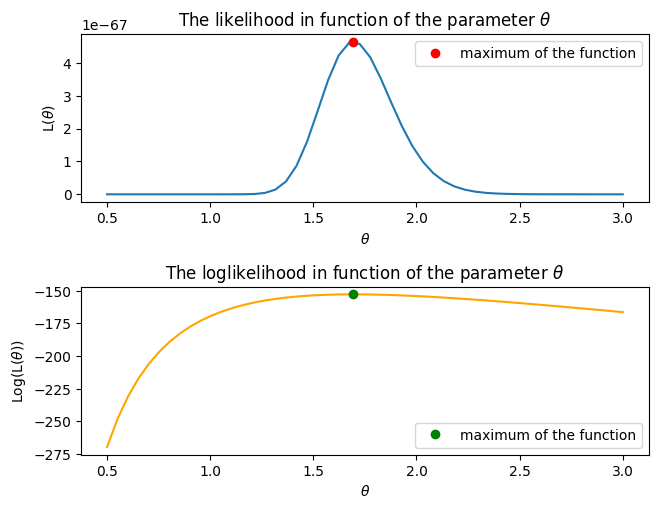

In [2]:
from math import exp
import matplotlib.pyplot as plt

#------------------------------------------------------------------------
#this method make the likelihood method a funcion of the parameter theta 
#------------------------------------------------------------------------
def Ltheta(L,theta,sample,pdf):

    ltheta = lambda theta : L(pdf,theta,sample)
    
    return ltheta(theta)

#--------------------------------------------------------------------------
#this method define the exponential pdf in function of a variable x
#--------------------------------------------------------------------------
def exp_func(x,tau):
    
    expr = lambda x : 1/tau*exp(-x/tau)
    
    return expr(x)

#--------------------------------------------------------------------------

def main():

    sample = generate_exp(2.0,100,10)

    theta = np.linspace(0.5,3)

    Ltheta = lambda theta : likelihood(exp_func,theta,sample)
    logLtheta = lambda theta : loglikelihood(exp_func,theta,sample)
    L = []
    
    for x in theta :
        L.append(Ltheta(x))

    logL = []

    for x in theta:
        logL.append(logLtheta(x))

    measure = stats.stats(sample)
    mean = measure.mean()
    err = measure.sigma_mean()
    max = goldenratioMax(Ltheta,0.5,3)
    logmax = goldenratioMax(logLtheta,0.5,3)


    print('The mean of the sample is ', mean , 'and is error is: ', err)
    
    fig, [ax1,ax2] = plt.subplots(2,1)
    fig.tight_layout(h_pad = 4.0)
    
    # First Graphics 

    ax1.plot(theta,L)
    ax1.plot(max,Ltheta(max),'o', color = 'red', label = 'maximum of the function') # plot the maixmum of Ltheta 
    ax1.set_title('The likelihood in function of the parameter ' + r'$\theta$')
    ax1.set_ylabel("L("+r"$\theta$" +")")
    ax1.set_xlabel(r"$\theta$")
    ax1.legend()

    # Second Graphics 

    ax2.plot(theta,logL, color = 'orange')
    ax2.plot(max,logLtheta(logmax),'o', color = 'green', label = 'maximum of the function') # plot the maixmum of Ltheta 
    ax2.set_title('The loglikelihood in function of the parameter ' + r'$\theta$')
    ax2.set_ylabel("Log(L("+r"$\theta$" +"))")
    ax2.set_xlabel(r"$\theta$")
    ax2.legend()
    
    
    print(max)
    print(logmax)

if __name__ == "__main__": main()

<h3> Exercise 10.4 </h3>
<p>Modify the loglikelihood function to calculate the logarithm of the product of the values of the probability density function, rather than the sum of individual logarithms. How does the algorithm’s behavior change?
We observe that the two method have the same behaviour in the esteem of the parameter tau</p>

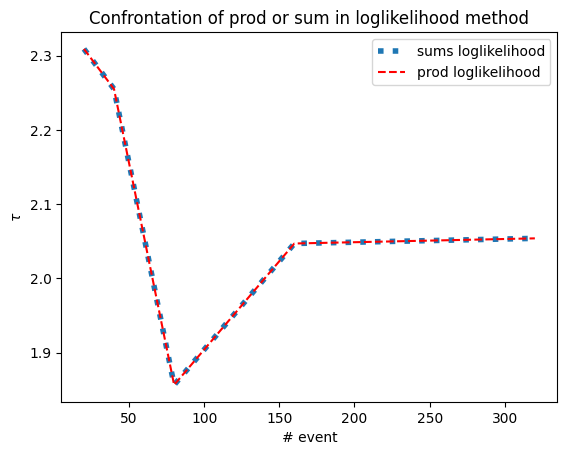

In [3]:
from math import log

def loglikelihood(pdf,theta, sample):
    
    loglike = 0 

    for x in sample:
        if pdf(x,theta) > 0.: loglike += log(pdf(x,theta))
    
    return loglike

def loglikelihood_prod(pdf,theta, sample):
    
    loglike = 1

    for x in sample:
        if pdf(x,theta) > 0.: loglike *= pdf(x,theta)

    return log(loglike)

def main():
    
    Nevt = 500
    Nevttest = 20
    tau_hat_sums = []
    tau_hat_prod = []
    N_evt_range = []
    bigsample = generate_exp(2.0,Nevt)

    while Nevttest <= Nevt:

        sample = bigsample[:Nevttest]
        tau_hat_sums.append(LEP(loglikelihood,exp_func,sample,0.5,3))
        tau_hat_prod.append(LEP(loglikelihood_prod,exp_func,sample,0.5,3))
        N_evt_range.append(Nevttest)
        Nevttest *= 2

    plt.plot(N_evt_range,tau_hat_sums,linestyle = 'dotted', linewidth = 4.0, label = 'sums loglikelihood')
    plt.plot(N_evt_range,tau_hat_prod,color = 'red', linestyle = 'dashed', label = 'prod loglikelihood')
    plt.title('Confrontation of prod or sum in loglikelihood method')
    plt.ylabel(r'$\tau$')
    plt.xlabel('# event')
    plt.legend()

if __name__ == "__main__": main()

<h3> Exercise 10.5 </h3>
<p>Graphically show that as the available sample size increases, the profile of the logarithm of the likelihood function becomes narrower.
<ul>
<li>To simplify visualization, use the logarithm of the ratio between the likelihood function and its maximum value:</li>
</ul>
</p> 

$$LLR(\theta) = log(\frac{L(\theta)}{L\hat{\theta}})$$

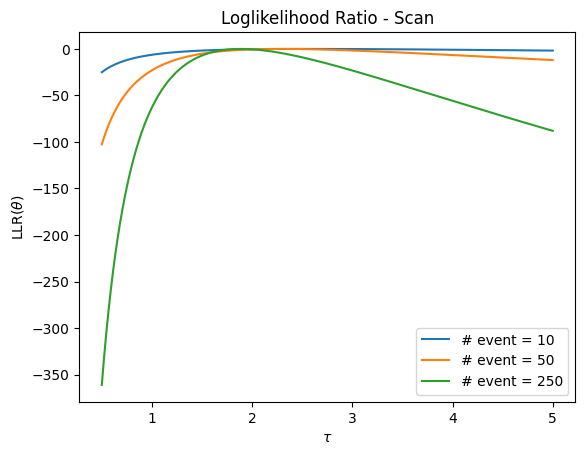

In [156]:
def main():

    tau_true = 2.0

    Nevt = 500
    Ntest = 10

    bigsample = generate_exp(tau_true,Nevt)
    tau= np.linspace(0.5,5.,1000)
    

    while Ntest <= Nevt:

        sample = bigsample[:Ntest]
        tau_hat = LEP(loglikelihood,exp_func,sample,0.5,5.)
        Lmax = Ltheta(loglikelihood,tau_hat,sample,exp_func)
        La = [Ltheta(loglikelihood,x,sample,exp_func) for x in tau]
        LLR = [x - Lmax for x in La ]
        plt.plot(tau,LLR, label = '# event = ' + str(Ntest))
        Ntest *= 5

    plt.title('Loglikelihood Ratio - Scan')
    plt.xlabel(r'$\tau$')
    plt.ylabel('LLR(' + r'$\theta$' ')')
    plt.legend()

if __name__ == "__main__": main()

<h3> Exercise 10.6 </h3>
<p> Use the bisection method to find the two points τ - στ and τ + στ related to Exercise 1.
<ul>
<li> Plot the log-likelihood profile, the estimator values, and the confidence interval along with the horizontal segment used for its determination.</li>
</ul>
 </p>

[1.4758108103442265, 1.9585558964107448]
1.694474453864794


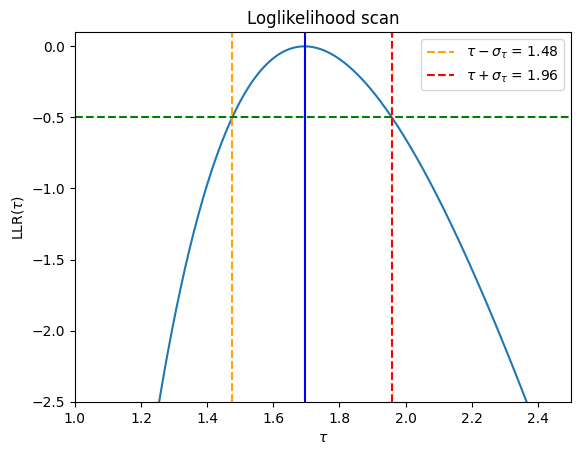

In [31]:
import bisection as bs
import stats as stats

#--------------------------------------------------------------------------------------------------------------
#This method apply the Rao Cramer theorem for the esteem of the point at one standard deviation from the mean
#--------------------------------------------------------------------------------------------------------------

def RaoCramer(g, # likelihood function 
              pdf, # probabolity distribution of the sample
              sample, # sample of the data 
              theta, # parameter of the likelihood function
              xmin, # minimum of the interval
              xmax #maximum of the interval
              ):
    
    theta_hat = LEP(g,pdf,sample,xmin,xmax)
    Lmax = Ltheta(g,theta_hat,sample,pdf)
    
    L = lambda theta: Ltheta(g,theta,sample,pdf) - Lmax + 0.5 # Applying theorem of Rao-Cramer

    zeros = bs.zinward(1000,xmin,xmax,L) #ziward algorithm search inside the bracke [xmin,xmax] for the zeros of the function
                                      # and return a list of the interval in which the zeors are contained 
     
    taus_minus_sigma = bs.bisection(zeros[0][0],zeros[0][1],L)
    tau_plus_sigma = bs.bisection(zeros[1][0],zeros[1][1],L)

    return [taus_minus_sigma,tau_plus_sigma]

#--------------------------------------------------------------------------------------------------------------
# this method calculate the loglikelihood ratio and return a list of the esteemed value 
#--------------------------------------------------------------------------------------------------------------

def LLR(pdf,theta,sample,xmin,xmax):

    L = []
    tau_hat= LEP(loglikelihood,pdf,sample,xmin,xmax)
    lmax = loglikelihood(pdf,tau_hat,sample)

    for x in theta:
        g = lambda x : loglikelihood(pdf,x,sample) - lmax
        L.append(g(x))
    
    return L


def main():

    xmin = 0.5
    xmax = 5.
    theta_true = 2.0

    sample = generate_exp(theta_true,50,10)
    theta = np.linspace(xmin,xmax,1000)
    tau_hat = LEP(loglikelihood,exp_func,sample,xmin,xmax)
    llr = LLR(exp_func,theta,sample,xmin,xmax)

    rao = RaoCramer(loglikelihood,exp_func,sample,theta,xmin,xmax)

    plt.plot(theta,llr)
    plt.ylim(top = 0.1, bottom = -2.5)
    plt.xlim(right = 2.5, left = 1.)
    plt.axvline(x = rao[0], color = 'orange', linestyle = 'dashed', label = r'$\tau - \sigma_{\tau}$ = ' + str(round(rao[0],2)))
    plt.axvline(x = rao[1], color = 'r', linestyle = 'dashed' , label = r'$\tau + \sigma_{\tau}$ = ' + str(round(rao[1],2)))
    plt.axvline(x = tau_hat, color = 'b')
    plt.axhline(y= -0.5, color='green', linestyle='dashed')
    plt.title ('Loglikelihood scan')
    plt.xlabel(r'$\tau$')
    plt.ylabel('LLR(' + r'$\tau$' + ')')
    plt.legend()
    print(rao)
    print(tau_hat)

if __name__ == '__main__': main()

<h3>Exercise 10.7 </h3>

<p> Using the toy experiments technique, plot the probability distribution of the τ estimator.
<ul>
<li> Overlay the generated histogram with the plot of the estimator and the confidence interval found in the previous exercise.</li>
<li> Compare the value of στ obtained in the previous exercise with the one calculated from the distribution of the numbers saved in the list.</li>
</ul>
 </p>

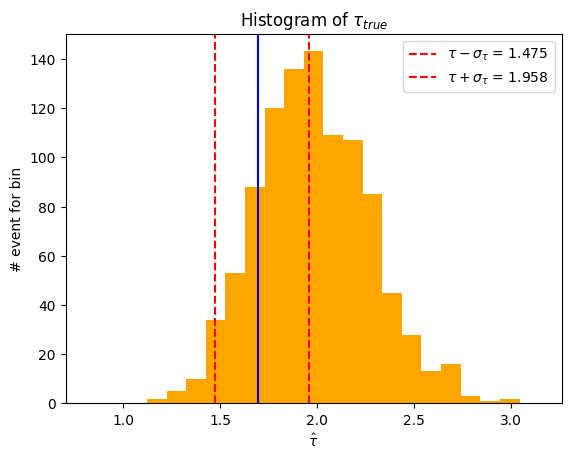

In [40]:
from math import ceil

#---------------------------------------------------------------------------------------------------------------
#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events
#---------------------------------------------------------------------------------------------------------------

def sturges(N_events):
    
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))
    
def main():

    tau_true = 2.0
    xmin = 0.5
    xmax = 5.
    tau_hat = []
    N = 1000

    for i in range(N):
        sample = generate_exp(tau_true,50)
        tau_hat.append(LEP(loglikelihood,exp_func,sample,xmin,xmax))

    nbins = sturges(tau_hat)
    
    measure = stats.stats(tau_hat)
    tau_mu = measure.mean()
    tau_sigma = measure.sigma()

    min = tau_mu - 4.*tau_sigma
    max = tau_mu + 4.*tau_sigma

    bin_edges = np.linspace(min,max,nbins)
    
    plt.hist(tau_hat,bins=bin_edges, color = 'orange')
    plt.title('Histogram of ' + r'$\tau_{true}$')
    plt.xlabel(r'$\hat{\tau}$')
    plt.ylabel('# event for bin')
    
    plt.axvline(x = 1.4758108103442265 , color = 'r', linestyle = 'dashed', label = r'$\tau - \sigma_{\tau}$ = ' + str(1.475))
    plt.axvline(x = 1.9585558964107448 , color = 'r', linestyle = 'dashed' , label = r'$\tau + \sigma_{\tau}$ = ' + str(1.958))
    plt.axvline(x = 1.694474453864794, color = 'b')
    plt.legend()
    
if __name__ == '__main__': main()




<h3>Exercise 10.8</h3>

<p> In the asymptotic regime, the distribution of the differences (τ - τ_true)/sigma_t follows a Normal distribution.
<ul>
<li> Use the toy experiments method to fill the histogram of the differences, given a number of events per toy experiment.</li>
<li> Calculate the mean and sigma of the distribution of differences, and plot their values as a function of the number of events available for estimation, showing the trend on a graph with the number of events available on the horizontal axis and the parameter value on the vertical axis.</li>
</ul>
 </p>

[-0.564396020280471, 0.24542369103968992, -0.13819760038149373, -3.3792220977182628, -0.4769561419918247, 0.06508418477020202, 0.1377466926851858, -0.23060372916389577, 0.203276447665017, 0.2337736015003513, -0.07141774941493248, 0.2683281575173922, 0.26847722036696875, -0.00498410254384913, 0.26822258746327543, 0.16954269465486418, -1.250955554354545, 0.2703945874268692, 0.02232600391667242, -0.6413002224679336, 0.2744101087618697, -0.029974494449617684, -0.5783729594846313, 0.2533111186269839, -0.7854022410759006, -4.315042421847028, -0.7491571081480559, -0.805545372728583, 0.1410680221330576, -6.812423126312911, -0.12025808131369868, 0.10336998075448278, 0.20370768224346014, 0.26781330108700774, -13.416407104037884, -0.04692610137431229, -5.205106592464539, -0.380358597733213, -1.1379121912209111, -0.013555826715655847, -0.30636282760841244, -0.2966693414253333, -0.5390106107308021, -5.282373880080917, -0.05381218477469731, 0.011519136810620861, 0.16281666777573447, -1.4212332923481

<ErrorbarContainer object of 3 artists>

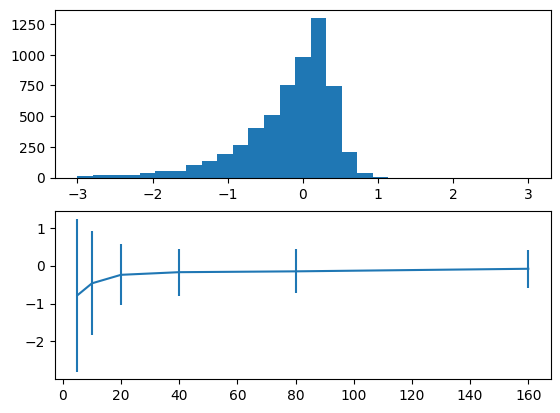

In [232]:
from math import sqrt

sample_size = 5
Ntoys = 1000
Nbig = 200

xmin = 0.5
xmax = 5.
tau_true = 2.0

z = []
N = []
diffMean = []
sigmaDiff = []

while sample_size <= Nbig:
    zIn= []
    for i in range(Ntoys):

        sample = generate_exp(tau_true,sample_size)
        
        tau_hat = LEP(loglikelihood,exp_func,sample,xmin,xmax)
        sigma = tau_hat**2/sqrt(len(sample)) #error on tau for and exponential pdf
        z.append((tau_hat-tau_true)/sigma)
        zIn.append((tau_hat-tau_true)/sigma)
    
    N.append(sample_size)
    diffMean.append(stats.stats(zIn).mean())
    sigmaDiff.append(stats.stats(zIn).sigma())

    sample_size*=2
  
print(z)

nbins = sturges(z)

b = stats.stats(z)


bins_edges = np.linspace(-3.0,3.0, nbins)

fig, (ax1,ax2) = plt.subplots(2,1)

ax1.hist(z,bins = bins_edges)

ax2.errorbar(N,diffMean, xerr = 0.0, yerr = sigmaDiff)

<p> Toy Experiment for demonstrate that variance in a real scenario is asymptoticaly not biased <p>


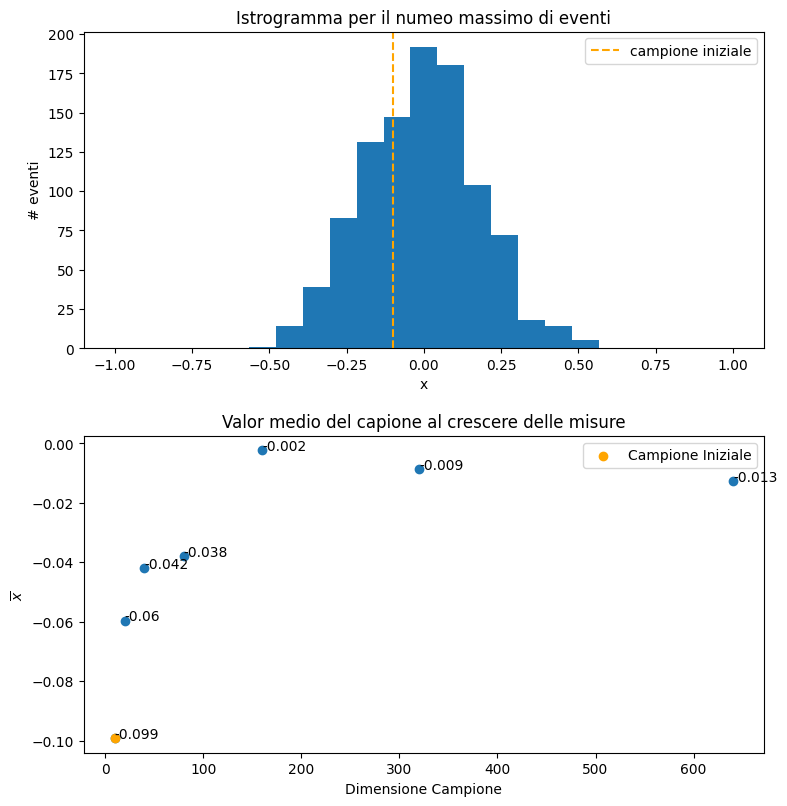

In [153]:
import stats as stats

# generate a pseudo random number with uniform pdf in an interval [xmin,xmax]

def rand_range (xMin,xMax):
    return xMin + random.random() * (xMax-xMin)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Generate pseduo-random numbers using Cenetral Limit Theorem 

def rand_TCL(xMin,xMax,N_sum = 10):
   
   y = 0.
   for i in range(N_sum):
      y = y + rand_range(xMin,xMax) #every time the function rand_TCL is called rand_range change value and produce a new average of 10 pseudo random numbers that follow a uniform distribution
   z = y/N_sum
   return z
   
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# this function generate N random numbers that follows a Gaussian Distribution when N get bigger 
# it was set N_sum = 10 for making sample set of ten pseudo random numbers to evaluate sample mean 

def generate_TCL(xMin,xMax,N, seed = 0.):

   if seed != 0. : random.seed(float(seed))
   randlist = []
   
   for j in range(N):
      
      randlist.append(rand_TCL(xMin,xMax))

   return randlist 
            
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events

def sturges(N_events):
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

def main():

    xmin = -1
    xmax = 1 
    
    Nmin = 10
    Nmax = 1000

    gauss = generate_TCL(xmin,xmax,10,9)
    mu = []
    N = []

    while Nmin < Nmax:
        gauss = generate_TCL(xmin,xmax,Nmin,9)
        sample = stats.stats(gauss)
        mu.append(sample.mean())
        N.append(Nmin)
        Nmin*=2

    
    fig, (ax1,ax2) = plt.subplots(2,1, figsize = (8,8))

    ax2.scatter(N,mu)
    rmu = []
    for x in mu:
        rmu.append(round(x,3))

    for i, txt in enumerate(rmu):
        ax2.annotate(txt, (N[i], mu[i]))
    plt.scatter(N[0],mu[0], color = 'orange' , label = 'Campione Iniziale')
    ax2.set_xlabel('Dimensione Campione')
    ax2.set_ylabel(r'$\overline{x}$')
    ax2.legend()
    ax2.set_title('Valor medio del capione al crescere delle misure')
    plt.tight_layout(h_pad = 3.0)
    
    gauss = generate_TCL(xmin,xmax,Nmax,9)

    nbins = sturges(gauss)
    bins_edges = np.linspace(xmin,xmax,nbins)

    ax1.hist(gauss,bins = bins_edges)
    ax1.set_title('Istrogramma per il numeo massimo di eventi')

    ax1.axvline(mu[0], color = 'orange' , linestyle = 'dashed', label = 'campione iniziale')
    ax1.set_ylabel('# eventi')
    ax1.set_xlabel('x')
    ax1.legend()

if __name__ == '__main__': main()